In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import r2_score

In [ ]:
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

df = pd.read_csv('/content/drive/MyDrive/Datasets/BigML_Dataset_5f50a4cc0d052e40e6000034.csv', sep=',')

# pd.options.display.float_format = '{:.4f}'.format

In [ ]:
display(df)

,Day of Year,Year,Month,Day,First Hour of Period,Is Daylight,Distance to Solar Noon,Average Temperature (Day),Average Wind Direction (Day),Average Wind Speed (Day),Sky Cover,Visibility,Relative Humidity,Average Wind Speed (Period),Average Barometric Pressure (Period),Power Generated
0,245,2008,9,1,1,False,0.859897,69,28,7.5,0,10.0,75,8.0,29.82,0
1,245,2008,9,1,4,False,0.628535,69,28,7.5,0,10.0,77,5.0,29.85,0
2,245,2008,9,1,7,True,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418
3,245,2008,9,1,10,True,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477
4,245,2008,9,1,13,True,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,243,2009,8,31,10,True,0.166453,63,27,13.9,4,10.0,75,10.0,29.93,6995
2916,243,2009,8,31,13,True,0.064020,63,27,13.9,1,10.0,66,15.0,29.91,29490
2917,243,2009,8,31,16,True,0.294494,63,27,13.9,2,10.0,68,21.0,29.88,17257
2918,243,2009,8,31,19,True,0.524968,63,27,13.9,2,10.0,81,17.0,29.87,677


In [ ]:
df["Is Daylight"] = df["Is Daylight"].astype(int)
df.info()

df = df.drop(columns = ["Day of Year"])
df = df.drop(columns = ["Month"])
df = df.drop(columns = ["Day"])
df = df.drop(columns = ["Visibility"])
df = df.drop(columns = ["Average Barometric Pressure (Period)"])

df.shape
display(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Day of Year                           2920 non-null   int64  
 1   Year                                  2920 non-null   int64  
 2   Month                                 2920 non-null   int64  
 3   Day                                   2920 non-null   int64  
 4   First Hour of Period                  2920 non-null   int64  
 5   Is Daylight                           2920 non-null   int64  
 6   Distance to Solar Noon                2920 non-null   float64
 7   Average Temperature (Day)             2920 non-null   int64  
 8   Average Wind Direction (Day)          2920 non-null   int64  
 9   Average Wind Speed (Day)              2920 non-null   float64
 10  Sky Cover                             2920 non-null   int64  
 11  Visibility       

,Year,First Hour of Period,Is Daylight,Distance to Solar Noon,Average Temperature (Day),Average Wind Direction (Day),Average Wind Speed (Day),Sky Cover,Relative Humidity,Average Wind Speed (Period),Power Generated
0,2008,1,0,0.859897,69,28,7.5,0,75,8.0,0
1,2008,4,0,0.628535,69,28,7.5,0,77,5.0,0
2,2008,7,1,0.397172,69,28,7.5,0,70,0.0,5418
3,2008,10,1,0.165810,69,28,7.5,0,33,0.0,25477
4,2008,13,1,0.065553,69,28,7.5,0,21,3.0,30069
...,...,...,...,...,...,...,...,...,...,...,...
2915,2009,10,1,0.166453,63,27,13.9,4,75,10.0,6995
2916,2009,13,1,0.064020,63,27,13.9,1,66,15.0,29490
2917,2009,16,1,0.294494,63,27,13.9,2,68,21.0,17257
2918,2009,19,1,0.524968,63,27,13.9,2,81,17.0,677


In [ ]:
df.describe()

,Year,First Hour of Period,Is Daylight,Distance to Solar Noon,Average Temperature (Day),Average Wind Direction (Day),Average Wind Speed (Day),Sky Cover,Relative Humidity,Average Wind Speed (Period),Power Generated
count,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2919.000000,2920.000000
mean,2008.665753,11.500000,0.618151,0.503294,58.468493,24.953425,10.096986,1.987671,73.513699,10.129154,6979.846233
std,0.471807,6.875041,0.485923,0.298024,6.841200,6.915178,4.838185,1.411978,15.077139,7.261547,10312.336413
min,2008.000000,1.000000,0.000000,0.050401,42.000000,1.000000,1.100000,0.000000,14.000000,0.000000,0.000000
25%,2008.000000,6.250000,0.000000,0.243714,53.000000,25.000000,6.600000,1.000000,65.000000,5.000000,0.000000
50%,2009.000000,11.500000,1.000000,0.478957,59.000000,27.000000,10.000000,2.000000,77.000000,9.000000,404.000000
75%,2009.000000,16.750000,1.000000,0.739528,63.000000,29.000000,13.100000,3.000000,84.000000,15.000000,12723.500000
max,2009.000000,22.000000,1.000000,1.141361,78.000000,36.000000,26.600000,4.000000,100.000000,40.000000,36580.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Year                          2920 non-null   int64  
 1   First Hour of Period          2920 non-null   int64  
 2   Is Daylight                   2920 non-null   int64  
 3   Distance to Solar Noon        2920 non-null   float64
 4   Average Temperature (Day)     2920 non-null   int64  
 5   Average Wind Direction (Day)  2920 non-null   int64  
 6   Average Wind Speed (Day)      2920 non-null   float64
 7   Sky Cover                     2920 non-null   int64  
 8   Relative Humidity             2920 non-null   int64  
 9   Average Wind Speed (Period)   2919 non-null   float64
 10  Power Generated               2920 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 251.1 KB


In [ ]:
df.fillna(0, inplace=True)
df.isnull().sum()

Year                            0
First Hour of Period            0
Is Daylight                     0
Distance to Solar Noon          0
Average Temperature (Day)       0
Average Wind Direction (Day)    0
Average Wind Speed (Day)        0
Sky Cover                       0
Relative Humidity               0
Average Wind Speed (Period)     0
Power Generated                 0
dtype: int64

array([<Axes: ylabel='Power Generated'>], dtype=object)

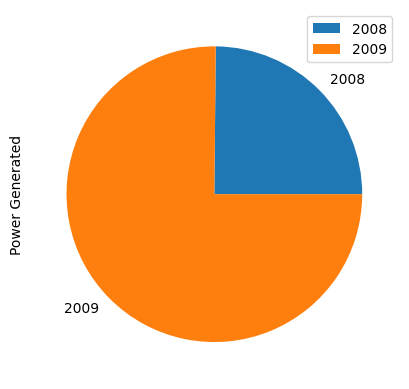

In [ ]:
subdata = df.groupby('Year').sum()['Power Generated']
subdata.plot(kind='pie',legend = True, subplots=True)

<Axes: >

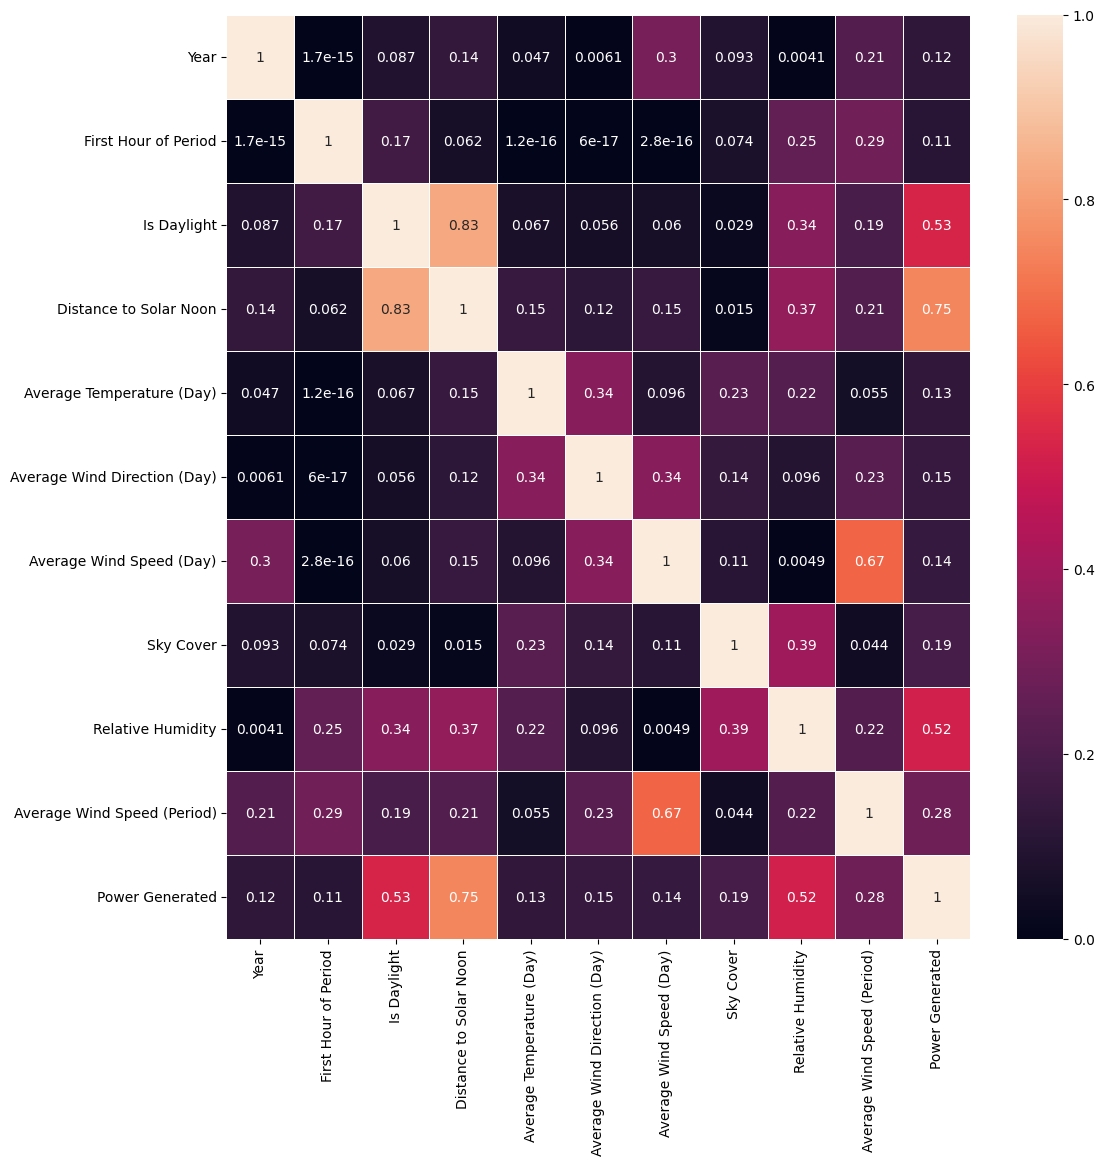

In [ ]:
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(df.corr().abs(), annot=True, linewidths=.5, ax=ax)

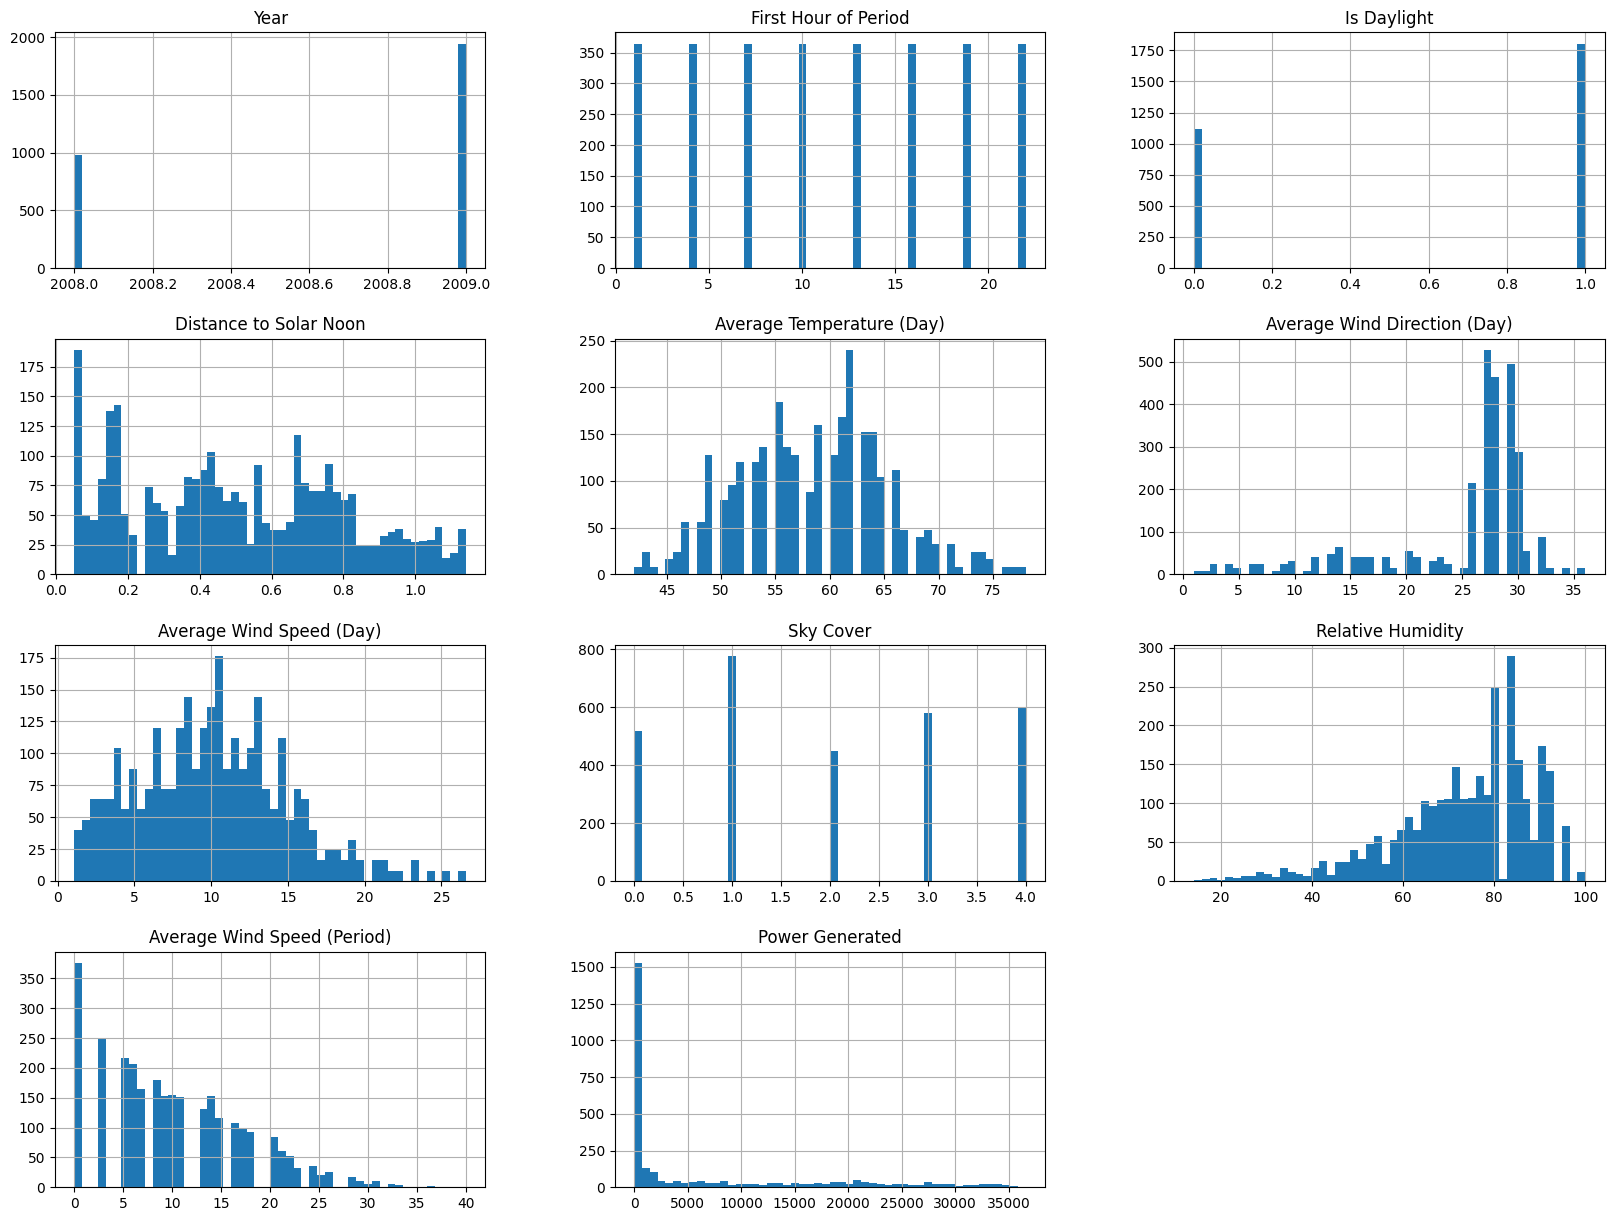

In [ ]:
df.hist(bins=50,figsize=(20,15))
plt.show()

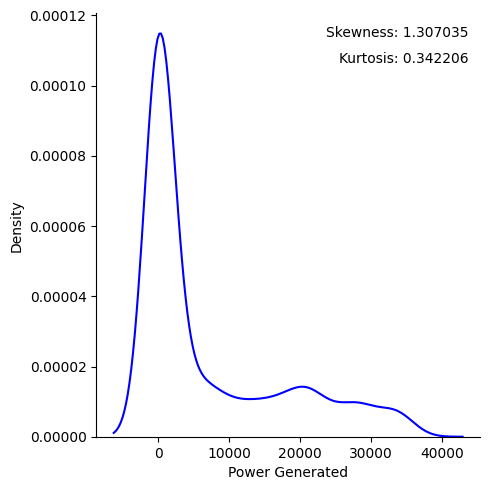

In [ ]:
graph = sns.displot(data=df, x="Power Generated",kind ='kde',color='blue')
for ax in graph.axes.ravel():
    ax.text(x=0.97, y=0.97, transform=ax.transAxes, s="Skewness: %f" % df['Power Generated'].skew(),\
        fontsize=10, verticalalignment='top', horizontalalignment='right')
    ax.text(x=0.97, y=0.91, transform=ax.transAxes, s="Kurtosis: %f" % df['Power Generated'].kurt(),\
        fontsize=10, verticalalignment='top', horizontalalignment='right')

Text(0, 0.5, 'Frequency')

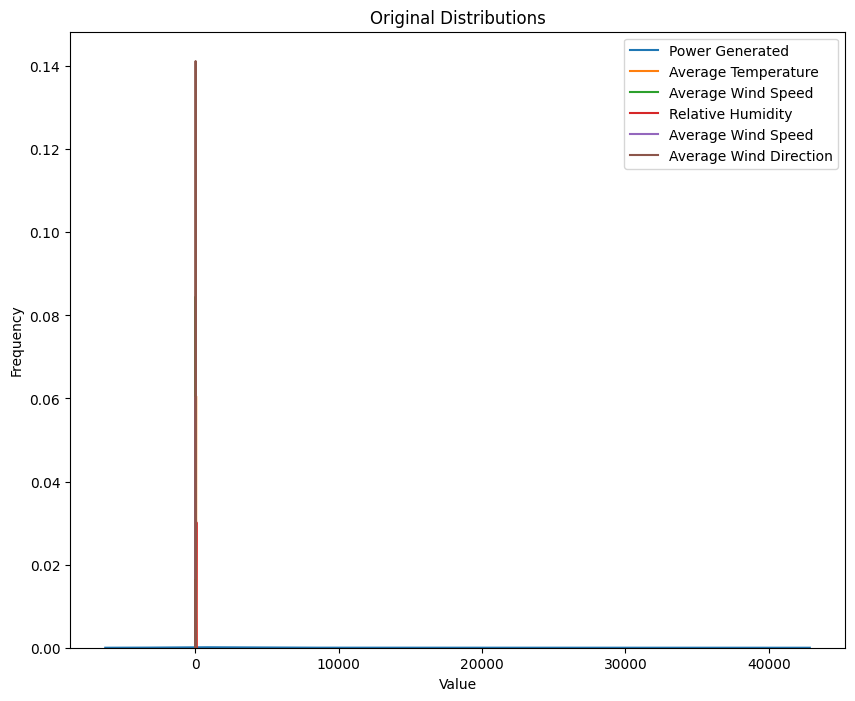

In [ ]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(10,8))
ax1.set_title('Original Distributions')

sns.kdeplot(df['Power Generated'], ax=ax1, label='Power Generated')
sns.kdeplot(df['Average Temperature (Day)'], ax=ax1, label='Average Temperature')
sns.kdeplot(df['Average Wind Speed (Day)'], ax=ax1, label='Average Wind Speed')
sns.kdeplot(df['Relative Humidity'], ax=ax1, label='Relative Humidity')
sns.kdeplot(df['Average Wind Speed (Period)'], ax=ax1, label='Average Wind Speed')
sns.kdeplot(df['Average Wind Direction (Day)'], ax=ax1, label='Average Wind Direction')

ax1.legend()
ax1.set_xlabel ('Value')
ax1.set_ylabel ('Frequency')

Text(0, 0.5, 'Frequency')

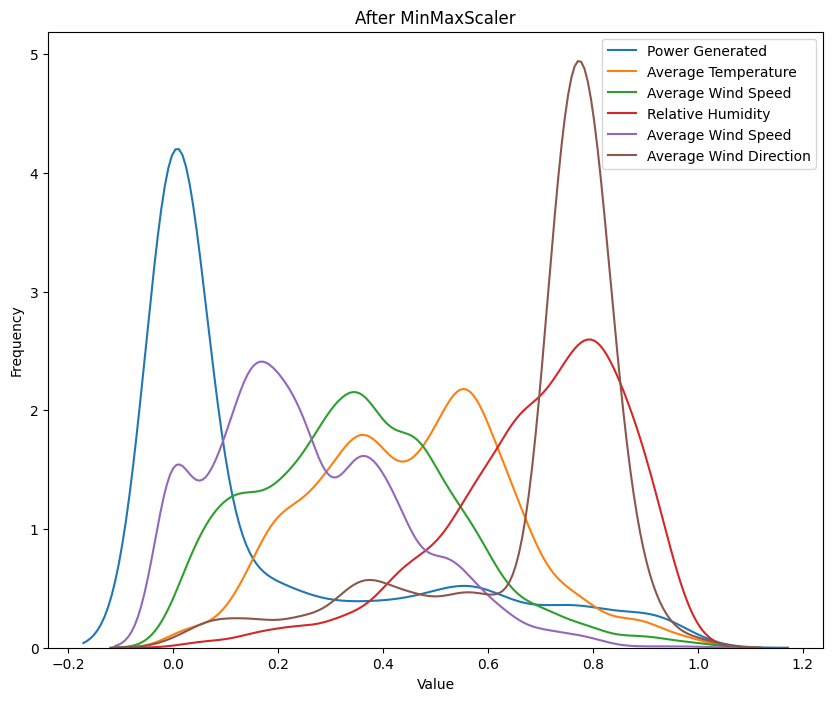

In [ ]:
scaler = preprocessing.MinMaxScaler()
scaler_power_generated = preprocessing.MinMaxScaler()
scaler_power_generated.fit(df[['Power Generated']])

df[['Power Generated',
    'Average Temperature (Day)',
    'Average Wind Speed (Day)',
    'Relative Humidity',
    'Average Wind Speed (Period)',
    'Average Wind Direction (Day)'
   ]] = scaler.fit_transform(df[['Power Generated',
                                 'Average Temperature (Day)',
                                 'Average Wind Speed (Day)',
                                 'Relative Humidity',
                                 'Average Wind Speed (Period)',
                                 'Average Wind Direction (Day)'
                                ]])

fig, (ax1) = plt.subplots(ncols=1,figsize=(10, 8))
ax1.set_title('After MinMaxScaler')

sns.kdeplot(df['Power Generated'], ax=ax1, label='Power Generated')
sns.kdeplot(df['Average Temperature (Day)'], ax=ax1, label='Average Temperature')
sns.kdeplot(df['Average Wind Speed (Day)'], ax=ax1, label='Average Wind Speed')
sns.kdeplot(df['Relative Humidity'], ax=ax1, label='Relative Humidity')
sns.kdeplot(df['Average Wind Speed (Period)'], ax=ax1, label='Average Wind Speed')
sns.kdeplot(df['Average Wind Direction (Day)'], ax=ax1, label='Average Wind Direction')

ax1.legend()
ax1.set_xlabel ('Value')
ax1.set_ylabel ('Frequency')

In [ ]:
X = df.iloc[:,0:10]
y = df.iloc[:,10]

In [ ]:
X.head(10)

,Year,First Hour of Period,Is Daylight,Distance to Solar Noon,Average Temperature (Day),Average Wind Direction (Day),Average Wind Speed (Day),Sky Cover,Relative Humidity,Average Wind Speed (Period)
0,2008,1,0,0.859897,0.750000,0.771429,0.250980,0,0.709302,0.200
1,2008,4,0,0.628535,0.750000,0.771429,0.250980,0,0.732558,0.125
2,2008,7,1,0.397172,0.750000,0.771429,0.250980,0,0.651163,0.000
3,2008,10,1,0.165810,0.750000,0.771429,0.250980,0,0.220930,0.000
4,2008,13,1,0.065553,0.750000,0.771429,0.250980,0,0.081395,0.075
5,2008,16,1,0.296915,0.750000,0.771429,0.250980,0,0.069767,0.575
6,2008,19,1,0.528278,0.750000,0.771429,0.250980,0,0.255814,0.375
7,2008,22,0,0.759640,0.750000,0.771429,0.250980,0,0.406977,0.150
8,2008,1,0,0.862113,0.833333,0.800000,0.223529,0,0.616279,0.150
9,2008,4,0,0.630155,0.833333,0.800000,0.223529,0,0.406977,0.000


In [ ]:
y.head()

0    0.000000
1    0.000000
2    0.148114
3    0.696473
4    0.822007
Name: Power Generated, dtype: float64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

In [ ]:
rmsle_val = []
best_rmsle = 1.0

for k in range(20):
    k = k+1
    knn = neighbors.KNeighborsRegressor(n_neighbors = k)

    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    rmsle = np.sqrt(mean_squared_log_error(y_test,y_pred))
    if (rmsle < best_rmsle):
        best_rmsle = rmsle
        best_k = k
    rmsle_val.append(rmsle)
    print('RMSLE value for k= ' , k , 'is:', rmsle)

print(f"Best RMSLE: {best_rmsle}, Best k: {best_k}")


RMSLE value for k=  1 is: 0.0813361167686482
RMSLE value for k=  2 is: 0.07130316047922348
RMSLE value for k=  3 is: 0.06837183342916907
RMSLE value for k=  4 is: 0.06551849259051497
RMSLE value for k=  5 is: 0.06412345125293233
RMSLE value for k=  6 is: 0.06363433222150022
RMSLE value for k=  7 is: 0.06370953687416882
RMSLE value for k=  8 is: 0.06398343487485723
RMSLE value for k=  9 is: 0.06482768093538513
RMSLE value for k=  10 is: 0.0661731366053233
RMSLE value for k=  11 is: 0.06699549942404986
RMSLE value for k=  12 is: 0.06794067717339874
RMSLE value for k=  13 is: 0.0680140303722776
RMSLE value for k=  14 is: 0.06830409890374951
RMSLE value for k=  15 is: 0.06872935501242322
RMSLE value for k=  16 is: 0.06904278389624127
RMSLE value for k=  17 is: 0.0692277968889119
RMSLE value for k=  18 is: 0.06956428683544388
RMSLE value for k=  19 is: 0.06975546396444686
RMSLE value for k=  20 is: 0.07013139639221679
Best RMSLE: 0.06363433222150022, Best k: 6


<Axes: >

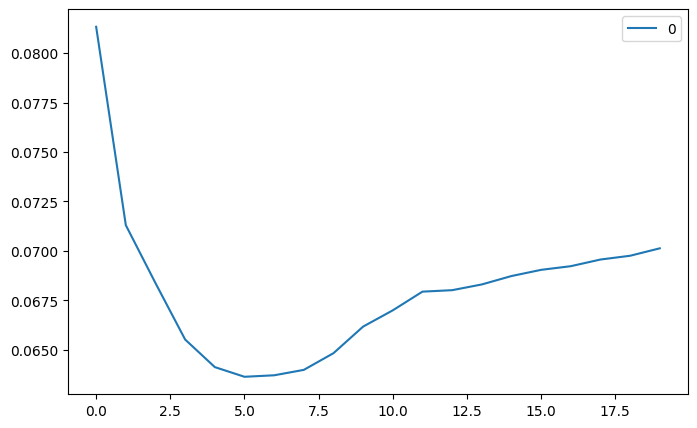

In [ ]:
curve = pd.DataFrame(rmsle_val)
curve.plot(figsize=(8,5))

In [ ]:
params = {'n_neighbors':[2,3,4,5,6,7,8,9,10,11]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params)
model.fit(X_train,y_train)
model.best_params_

{'n_neighbors': 5}

In [ ]:
knn = neighbors.KNeighborsRegressor(n_neighbors = 6)

knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)
knn.score(X_test, y_test)

0.9055826293772716

In [ ]:
forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(X_train, y_train)
y_pred_rf = forest_model.predict(X_test)
forest_model.score(X_test, y_test)

0.9203515129942916

In [ ]:
import joblib
estimators=[("knn", knn), ("rf", forest_model)]
ensemble_stack = StackingRegressor(estimators=estimators)
ensemble_stack.fit(X_train, y_train)

y_pred_stacking = ensemble_stack.predict(X_test)
ensemble_stack.score(X_test, y_test)
model=ensemble_stack
joblib.dump(ensemble_stack, 'ensemble_model.pkl')

['ensemble_model.pkl']

In [ ]:
knn_evs_valid = explained_variance_score(y_test, y_pred_knn, multioutput='uniform_average')
knn_max_error_valid = max_error(y_test, y_pred_knn)
knn_rmsle_valid = np.sqrt(mean_squared_log_error(y_test, y_pred_knn))
knn_mse_valid = mean_squared_error(y_test, y_pred_knn)
knn_r2_valid = r2_score(y_test, y_pred_knn)

print('KNN - EVS      Valid:', knn_evs_valid)
print('KNN - MaxError Valid:', knn_max_error_valid)
print('KNN - MSE      Valid:', knn_mse_valid)
print('KNN - R2       Valid:', knn_r2_valid)
print('KNN - RMSLE    Valid:', knn_rmsle_valid)

KNN - EVS      Valid: 0.9058703623346296
KNN - MaxError Valid: 0.7770913067249863
KNN - MSE      Valid: 0.007508852086832143
KNN - R2       Valid: 0.9055826293772716
KNN - RMSLE    Valid: 0.06363433222150022


In [ ]:
rf_evs_valid = explained_variance_score(y_test, y_pred_rf, multioutput='uniform_average')
rf_max_error_valid = max_error(y_test, y_pred_rf)
rf_rmsle_valid = np.sqrt(mean_squared_log_error(y_test, y_pred_rf))
rf_mse_valid = mean_squared_error(y_test, y_pred_rf)
rf_r2_valid = r2_score(y_test, y_pred_rf)


print('RF - EVS      Valid:', rf_evs_valid)
print('RF - MaxError Valid:', rf_max_error_valid)
print('RF - MSE      Valid:', rf_mse_valid)
print('RF - R2       Valid:', rf_r2_valid)
print('RF - RMSLE    Valid:', rf_rmsle_valid)

NameError: name 'explained_variance_score' is not defined

In [ ]:
stacking_evs_valid = explained_variance_score(y_test, y_pred_stacking, multioutput='uniform_average')
stacking_max_error_valid = max_error(y_test, y_pred_stacking)
# stacking_rmsle_valid = mean_squared_log_error(y_test, y_pred_stacking)
stacking_mse_valid = mean_squared_error(y_test, y_pred_stacking)
stacking_r2_valid = r2_score(y_test, y_pred_stacking)


print('Stacking - EVS      Valid:', stacking_evs_valid)
print('Stacking - MaxError Valid:', stacking_max_error_valid)
print('Stacking - MSE      Valid:', stacking_mse_valid)
print('Stacking - R2       Valid:', stacking_r2_valid)
# print('Stacking - RMSLE    Valid:', stacking_rmsle_valid)

Stacking - EVS      Valid: 0.9234930615425726
Stacking - MaxError Valid: 0.6017566450399927
Stacking - MSE      Valid: 0.006084694157940763
Stacking - R2       Valid: 0.923490193069096


In [ ]:
data_prediction_knn = list(zip(y_test,y_pred_knn))
data_prediction_knn = pd.DataFrame(data_prediction_knn, columns=['Test','Prediction-KNN'])

data_prediction_rf = list(zip(y_test,y_pred_rf))
data_prediction_rf = pd.DataFrame(data_prediction_rf, columns=['Test','Prediction-RF'])

data_prediction_stacking = list(zip(y_test,y_pred_stacking))
data_prediction_stacking = pd.DataFrame(data_prediction_stacking, columns=['Test','Prediction-Stacking'])

In [ ]:
dfs = [data_prediction_knn, data_prediction_rf, data_prediction_stacking]
dfs = [df.set_index('Test') for df in dfs]
dfs = pd.concat(dfs, join='outer', axis = 1)

dfs.head(15)

,Prediction-KNN,Prediction-RF,Prediction-Stacking
Test,,,
0.0000,0.0000,0.0000,-0.0014
0.0000,0.0000,0.0000,-0.0014
0.0000,0.0000,0.0000,-0.0014
0.0000,0.0000,0.0000,-0.0014
0.0124,0.0036,0.0128,0.0092
0.0990,0.1530,0.0898,0.1052
0.0000,0.0000,0.0000,-0.0014
0.3662,0.3510,0.4078,0.3955
0.0622,0.3106,0.3085,0.3103


In [ ]:
predicted_values_original_scale_power_generated = scaler_power_generated.inverse_transform(y_pred_stacking.reshape(-1, 1)).flatten()

In [ ]:
predicted_values_original_scale_power_generated = np.abs(predicted_values_original_scale_power_generated)

In [ ]:
df1 = pd.DataFrame(predicted_values_original_scale_power_generated, columns=['Column1'])

In [ ]:
display(df1)

,Column1
0,50.8640
1,50.8640
2,50.8640
3,50.8640
4,337.5622
...,...
871,50.8640
872,8048.3101
873,15763.9868
874,15823.6316
